Uno de los objetivos del notebook es probar las ecuaciones del modelo de [Miyashima et al.](https://www.nature.com/articles/s41586-018-0839-y) para evaluar la frontera de transcripción entre las proteínas PEAR y los HD-ZIPIII. En resumen, lo que ellos modelan es una sola dimensión que representa las células que van del centro de la raíz hacia el exterior. Se simulan tres, cuatro o cinco células subdivididas por dos, tres o cuatro paredes, respectivamente. Los compartimentos se numeran de 1 (xilema) a $N$ (estele) donde $N$ es el total de compartimentos. El subconjunto de compartimentos celulares se denota por $K$ y el subconjunto de componentes de la pared por $W$. En la figura 1 se muestra un resumen de la dinámica del modelo así como la estructura de la red que proponen. 

<img src="Images/myshima_model.png" style="width: 600px;">



## Difusión de los elementos. 
La difusión de los componentes se hace con elementos de difusión standard con la excepción de PEAR. Para simular el bloqueo de PEAR por HD-ZIPIII el coeficiente de difusión entre compartimentos adyacentes se modifica por una función decreciente del valor promedio de HD-ZIPIII entre dos compartimentos.
$$ J = D_{p} \Bigg( \frac{P_{i-1}-P_{i}}{1+ \Big( \frac{H_{i-1}+H_{i}}{2\phi}\Big)^{q}} \Bigg) $$
donde $J$ es el flujo de PEAR entre compartimentos $i$ e $i-1$, $D_{p}$ es el coeficiente de difusión, $P$ es la concentración de PEAR y $H$ la concentración de HD-ZIPIII.


## Funciones de activación transcripcional

La expresión génetica se hace con funciones de Hill siguiendo la lógica de activación o represión. HDZIPIII tiene una constante de activación más funciones de incremento de auxina y PEAR:
    $$F_{h}(A,P) = \lambda \Bigg(1 + \frac{A^{n_h}}{\theta_{h}^{n_h} + A^{n_h}} + \frac{P^{m_h}}{\psi_{h}^{m_h} + P^{m_h}}\Bigg)$$
Donde $\theta_{h}$ y $\psi_{h}$ son parámetros umbrales, $n_{h}$ y $m_{h}$ son coeficientes de Hill y $\lambda$ es una constante de proporcionalidad.

PEAR se activa por la respuesta a la citoquinina (WOL) y se reprime por HD-ZIPIII por lo que se usa el producto positivo de una función positiva y una negativa de forma Hill:
$$F_{p}(H,R) = \frac{\theta_{p}^{n_p}}{\theta_{p}^{n_p} + H^{n_P}} \times \frac{{R}^{m_p}}{\phi_{p}^{m_p} + R^{m_p}}$$
Donde $\theta_{p}$ y $\phi_{p}$ son parámetros umbrales, $n_{p}$ y $m_{p}$ son coeficientes de Hill.

La producción de citoquinina depende del input de auxina:
$$F_{c}(A) = \frac{A^{n_c}}{\theta_{c}^{n_c} + A^{n_c}}$$ 
Donde $\theta_{c}$ es el parámetro umbral.

Por último la respuesta a la citoquinina se regula positivamente por la citoquinina pero negativamente por la auxina:  
$$F_{r}(A,C) = \frac{\theta_{r}^{n_r}}{\theta_{r}^{n_r} + A^{n_r}} \times \frac{C^{m_r}}{\psi_{r}^{m_r} + C^{m_r}}  $$
Donde $\theta_{r}$ y $\psi_{r}$ son parámetros umbrales, $n_{r}$ y $m_{r}$ son coeficientes de Hill.


## Ecuaciones diferenciales para los compartimentos

Las funciones de transcripción se incorporan en una serie de ecuaciones diferenciales para cada compartimento y subcompartimento celular. Para $1 < i < N$ e $i \in K$ de compartimentos lejos de la frontera tenemos:

$$\frac{\partial M_{i}}{\partial t} = D_{m}(M_{i-1} + M_{i+1} -2M_{i}) -\mu_{m}M_{i}-\eta_{m}M_{i}H_{i}$$ 
$$\frac{\partial H_{i}}{\partial t} = \mu_{h}( F_{h}(\hat{A}_{i},\hat{P}_{i})-H_{i}-\eta_{h}M_{i}H_{i})$$
$$\frac{\partial P_{i}}{\partial t} = \mu_{p}( F_{p}(\hat{H}_{i},\hat{R}_{i})-P_{i}) + D_{p}\Bigg( \frac{P_{i-1}-P_{i}}{1+ \big(\frac{H_{i-1}+H_{i}}{2\phi}\big)^q} + \frac{P_{i+1}-P_{i}}{1+ (\frac{H_{i1}+H_{i+1}}{2\phi})^q}\Bigg)$$
$$\frac{\partial A_{i}}{\partial t} = \alpha_{i} - A_{i} + D_{a}(A_{i-1} + A_{1+1} - 2A_{i})$$
$$\frac{\partial C_{i}}{\partial t} = \mu_{c}(F_{c}(\hat{A}_{i})-C_{i}) + D_{c}(C_{i-1} + C_{1+1} - 2C_{i})$$
$$\frac{\partial R_{i}}{\partial t} = \mu_{r}(F_{r}(\hat{A}_{i},\hat{C}_{i})- R_{i})$$

Donde $D_{m}, D_{p}, D_{a}$ y $D_{c}$ son coeficientes de difusión de miRNA, PEAR, auxina y citoquinina. $\mu_{m}, \mu_{h}, \mu_{p}, \mu_{c}$ y $\mu_{r}$ son las tasas de recambio de miRNA, HD-ZIPIII, PEAR, citoquinina y respuesta a citoquinina (WOL). $\eta_{m}$ y $\eta_{h}$ son las tasas de degradación mutua entre miRNA y HD-ZIPIII. $\alpha_{i}$ es la tasa de producción de auxinas y se fija a 0 con excepción del compartimento 1 que representa el centro del estele. 

Las ecuaciones diferenciales son distintas para los compartimentos de frontera, fijando a 0 el flujo. A continuación se describen las ODE de los compartimentos de frontera. Para el centro del estele $(i=1)$:
$$\frac{\partial M_{1}}{\partial t} = D_{m}(M_{2} - M_{1}) - \mu_{m}M_{1}-\eta_{m}M_{1}H_{1}$$ 
$$\frac{\partial H_{1}}{\partial t} = \mu_{h}( F_{h}(\hat{A}_{1},\hat{P}_{1})-H_{1}-\eta_{h}M_{1}H_{1})$$
$$\frac{\partial P_{1}}{\partial t} = \mu_{p}( F_{p}(\hat{H}_{1},\hat{R}_{1})-P_{1}) + D_{p}\Bigg( \frac{P_{2}-P_{1}}{1+ \big(\frac{H_{1}+H_{2}}{2\phi}\big)^q}\Bigg)$$
$$\frac{\partial A_{1}}{\partial t} = \alpha_{1} - A_{1} + D_{a}(A_{2} + A_{1})$$
$$\frac{\partial C_{1}}{\partial t} = \mu_{c}(F_{c}(\hat{A}_{1})-C_{1}) + D_{c}(C_{2} - C_{1})$$
$$\frac{\partial R_{1}}{\partial t} = \mu_{r}(F_{r}(\hat{A}_{i},\hat{C}_{i})-R_{i})$$
Por último para la parte exterior del estele $(i=N)$ también se fija el flujo a 0 con excepción de miRNA. Las ecuaciones diferenciales son las siguientes:
$$\frac{\partial M_{N}}{\partial t} = D_{m}(M_{N-1} - 2M_{N} + M_{bnd}) - \mu_{m}M_{N}-\eta_{m}M_{N}H_{N}$$ 
$$\frac{\partial H_{N}}{\partial t} = \mu_{h}( F_{h}(\hat{A}_{N},\hat{P}_{N})-H_{N}-\eta_{h}M_{N}H_{N})$$
$$\frac{\partial P_{N}}{\partial t} = \mu_{p}( F_{p}(\hat{H}_{N},\hat{R}_{N})-P_{N}) + D_{p}\Bigg( \frac{P_{N-1}-P_{N}}{1+ \big(\frac{H_{N-1}+H_{N}}{2\phi}\big)^q}\Bigg)$$
$$\frac{\partial A_{N}}{\partial t} = - A_{N} + D_{a}(A_{N-1} + A_{N})$$
$$\frac{\partial C_{N}}{\partial t} = \mu_{c}(F_{c}(\hat{A}_{N})-C_{N}) + D_{c}(C_{N-1} - C_{N})$$
$$\frac{\partial R_{N}}{\partial t} = \mu_{r}(F_{r}(\hat{A}_{N},\hat{C}_{N})-R_{N})$$

En este cuaderno se modelan primero dos compartimentos celulares sin considerar subcompartimentos. A continuación se cargan los paquetes necesarios para determinar los valores en el equilibrio y además se usan los parámetros utilizados en la información suplementaria de Miyashima. Después de modelar los dos compartimentos se agrgan dos más para hacerlo con cuatro.

In [1]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt


In [2]:
#Load all the parameters of the model
lamda=0.5
tetha_h=1
psi_h=1
n_h=1
m_h=1
tetha_p=0.2
psi_p=0.1
n_p=4
m_p=1
tetha_c=0.1
n_c=1
tetha_r=0.1
psi_r=0.1
n_r=1
m_r=1
m_a=1
n_a=1
tetha_a=0.2
#Difusión
Dm=400
Dp=300
Da=10
Dc=1000
psi=0.005
q=2
#Turnover
mu_h=1
mu_p=1
mu_c=1
mu_r=1

# hdzipiii and mirna interaction
M_bnd=1
teta_m=500
teta_h=1000
alpha_1=1
mu_m=1

#
t0=0
tf=10
n=100
t=np.linspace(t0,tf,n)

In [3]:
def dx_dt(X,t):
    #The function returns an array with 12 values: 6 per cell
    #X0=m1 X1=h1 X2=p1 X3=a1 X4=c1 X5=r1 X6=m2 X7=h2 X8=p2 X9=a2 X10=c2 X11=r2 X12=m2
    #Transcription activation functions
    f_h1 = lamda *(1 +((X[3]**n_h)/(tetha_h**n_h)+(X[3]**n_h))) + ((X[2]**m_h)/(psi_h**m_h + X[2]**m_h))
    f_h2 = lamda *(1 +((X[9]**n_h)/(tetha_h**n_h)+(X[9]**n_h))) + ((X[8]**m_h)/(psi_h**m_h + X[8]**m_h))
    f_p1 = tetha_p**n_p/((tetha_p**n_p) + X[1]**n_p) * ((X[5]**m_p)/((psi_p**m_p) + X[5]**m_p))
    f_p2 = tetha_p**n_p/((tetha_p**n_p) + X[7]**n_p) * ((X[11]**m_p)/((psi_p**m_p)+ X[11]**m_p))
    f_c1 = X[3]**n_c/((tetha_c**n_c)+ X[3]**n_c)
    f_c2 = X[9]**n_c/((tetha_c**n_c)+ X[9]**n_c)
    f_r1 = tetha_r**n_r/((tetha_r**n_r)+X[3]**n_r) * ((X[4]**m_r)/((psi_r**m_r)+X[4]**m_r))
    f_r2 = tetha_r**n_r/((tetha_r**n_r)+X[9]**n_r) * ((X[10]**m_r)/((psi_r**m_r)+X[10]**m_r))
    #Differential equations
    dm1dt= Dm*(X[6]-X[0])- (mu_m*X[0]) - (teta_m*X[0]*X[1])
    dm2dt= Dm*(X[0]-(2*X[6])+M_bnd)-(mu_m*X[6])- (teta_m*X[6]*X[7])
    dh1dt= mu_h*(f_h1-X[1]-(teta_h*X[0]*X[1]))
    dh2dt= mu_h*(f_h2-X[7]-(teta_h*X[6]*X[7]))
    dp1dt= mu_p*(f_p1-X[2])+ Dp*((X[8]-X[2])/1+(((X[1]+X[7])/(2*psi))**q))
    dp2dt= mu_p*(f_p2-X[8])+ Dp*((X[2]-X[8])/1+(((X[1]+X[7])/(2*psi))**q))
    da1dt= alpha_1 -X[3]+Da*(X[9]-X[3])
    da2dt= -X[9]+Da*(X[3]-X[9])
    dc1dt= mu_c*(f_c1 - X[4])+Dc*(X[10]-X[4])
    dc2dt= mu_c*(f_c2 -X[10])+Dc*(X[4]-X[10])
    dr1dt= mu_r*(f_r1 -X[5])  
    dr2dt= mu_r*(f_r2 -X[11])
    return np.array([dm1dt,dh1dt,dp1dt,da1dt,dc1dt, dr1dt,dm2dt,dh2dt,dp2dt,da2dt,dc2dt, dr2dt])
    #Return an array with the different values per cell

In [5]:
#Initial conditions
dx_dt_ci= np.array([0,2,0,0,0,0,
                   0,0,0,0,0,0])

## Integrate the two cells
X, infodict = integrate.odeint(dx_dt ,dx_dt_ci, t, full_output=True)
# infodict['message']                      # integration successful


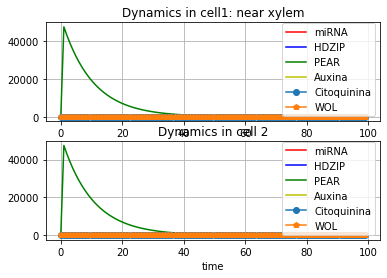

In [11]:
#extract the values of the array
x,y,z,w,a,b,x2,y2,z2,w2,a2,b2 = X.T
#plot

ax = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2)
ax.plot(x, 'r-', label='miRNA')
ax.plot(y, 'b-', label='HDZIP')
ax.plot(z, 'g-', label='PEAR')
ax.plot(w, 'y-', label='Auxina')
ax.plot(a, 'o-', label='Citoquinina')
ax.plot(b, 'p-', label='WOL')
ax.set_xlabel('time')
ax.set_title("Dynamics in cell1: near xylem")
ax.grid()
ax.legend(loc='best')

ax2.plot(x2, 'r-', label='miRNA')
ax2.plot(y2, 'b-', label='HDZIP')
ax2.plot(z2, 'g-', label='PEAR')
ax2.plot(w2, 'y-', label='Auxina')
ax2.plot(a2, 'o-', label='Citoquinina')
ax2.plot(b2, 'p-', label='WOL') 
ax2.set_title("Dynamics in cell 2")
ax2.set_xlabel("time")
ax2.grid()
ax2.legend(loc='best')



In [12]:
#Ahora hacer una función en donde vengan más células
def dx_dt_1(X,t):
    #X0=m1 X1=h1 X2=p1 X3=a1 X4=c1 X5=r1 X6=m2 X7=h2 X8=p2 X9=a2 X10=c2 X11=r2 X12=m3
    #X13=h3 X14=p3 X15=a3 X16=c3 X17=r3 X18=m4 X19=h4 X20=p4 X21=a4 X22=c4 X23=r4
    #Poner las funciones de activación trasncripcional
    f_h1 = lamda *(1 + X[3]**n_h/(tetha_h**n_h+ X[3] **n_h)) + (X[2]**m_h/(psi_h**m_h + X[2]**m_h))
    f_h2 = lamda *(1 + X[9]**n_h/(tetha_h**n_h+X[9]**n_h)) + (X[8]**m_h/(psi_h**m_h + X[8]**m_h))
    f_h3 = lamda *(1 + X[15]**n_h/(tetha_h**n_h+X[15]**n_h)) + (X[14]**m_h/(psi_h**m_h + X[14]**m_h))
    f_h4 = lamda *(1 + X[21]**n_h/(tetha_h**n_h+ X[21] **n_h)) + (X[20]**m_h/(psi_h**m_h + X[20]**m_h))
    
    f_p1 = (tetha_p**n_p/(tetha_p**n_p+X[1]**n_p)) * (X[5]**m_p/(psi_p**m_p + X[5]**m_p))
    f_p2 = (tetha_p**n_p/(tetha_p**n_p+X[7]**n_p)) * (X[11]**m_p/(psi_p**m_p + X[11]**m_p))
    f_p3 = (tetha_p**n_p/(tetha_p**n_p+X[13]**n_p)) * (X[17]**m_p/(psi_p**m_p + X[17]**m_p))
    f_p4 = (tetha_p**n_p/(tetha_p**n_p+X[19]**n_p)) * (X[23]**m_p/(psi_p**m_p + X[23]**m_p))
    
    f_c1 = X[3]**n_c/(tetha_c**n_c)+ X[3]**n_c
    f_c2 = X[9]**n_c/(tetha_c**n_c)+ X[9]**n_c
    f_c3 = X[15]**n_c/(tetha_c**n_c)+ X[15]**n_c
    f_c4 = X[21]**n_c/(tetha_c**n_c)+ X[21]**n_c
    
    f_r1 = (tetha_r**n_r)/((tetha_r**n_r)+X[3]**n_r) * (X[4]**m_r)/((psi_r**m_r)+X[4]**m_r)
    f_r2 = (tetha_r**n_r)/((tetha_r**n_r)+X[9]**n_r) * (X[10]**m_r)/((psi_r**m_r)+X[10]**m_r)
    f_r3 = (tetha_r**n_r)/((tetha_r**n_r)+X[15]**n_r) * (X[16]**m_r)/((psi_r**m_r)+X[16]**m_r)
    f_r4 = (tetha_r**n_r)/((tetha_r**n_r)+X[21]**n_r) * (X[22]**m_r)/((psi_r**m_r)+X[22]**m_r)
    
    dm1dt= Dm*(X[6]-X[0])-mu_m*X[0]- teta_m*X[0]*X[1]
    dm2dt= Dm*(X[0]+ X[12]-2*X[6])-mu_m*X[6]-teta_m*X[6]*X[7]
    dm3dt= Dm*(X[6]+ X[18]-2*X[12])-mu_m*X[12]-teta_m*X[12]*X[13]
    dm4dt= Dm*(X[12]-2*X[18]+M_bnd)-mu_m*X[18]-teta_m*X[18]*X[19]    
    
    dh1dt= mu_h*(f_h1-X[1] -teta_h*X[0] *X[1])
    dh2dt= mu_h*(f_h2-X[7] -teta_h*X[6] *X[7])
    dh3dt= mu_h*(f_h3-X[13]-teta_h*X[12]*X[13])
    dh4dt= mu_h*(f_h4-X[19]-teta_h*X[18]*X[19])
    
    dp1dt= mu_p*(f_p1 - X[2])+ Dp*(X[8]-X[2]/1+(X[1]+X[7]/2*psi)**q)
    dp2dt= mu_p*(f_p2 - X[8])+ Dp*((X[2]-X[8]/1+(X[1]+X[7]/2*psi)**q)+(X[14]-X[8]/1+(X[7]+X[13]/2*psi)**q))
    dp3dt= mu_p*(f_p3 - X[14])+ Dp*((X[8]-X[14]/1+(X[7]+X[13]/2*psi)**q)+(X[20]-X[14]/1+(X[19]+X[13]/2*psi)**q))
    dp4dt= mu_p*(f_p4 - X[20])+ Dp*(X[14]-X[20]/1+(X[13]+X[19]/2*psi)**q)
    
    da1dt= alpha_1 - X[3] + Da*(X[9]-X[3])
    da2dt= 0 -X[9] +Da*(X[3]+X[15]-2*X[9])
    da3dt= 0 -X[15]+Da*(X[9]+X[21]-2*X[15])
    da4dt= -X[21]+Da*(X[15]-X[21])
    
    dc1dt= mu_c*(f_c1 - X[4])+ Dc*(X[10]-X[4])
    dc2dt= mu_c*(f_c2 -X[10])+Dc*(X[4]+X[16]-2*X[10])
    dc3dt= mu_c*(f_c3 -X[16])+Dc*(X[10]+X[22]-2*X[16])
    dc4dt= mu_c*(f_c4 -X[22])+Dc*(X[16]-X[22])
    
    dr1dt= mu_r*(f_r1 - X[5])  
    dr2dt= mu_r*(f_r2 -X[11])
    dr3dt= mu_r*(f_r3 -X[17])
    dr4dt= mu_r*(f_r4 -X[23])
    return np.array([dm1dt,dh1dt,dp1dt,da1dt,dc1dt, dr1dt,
                     dm2dt,dh2dt,dp2dt,da2dt,dc2dt, dr2dt,
                     dm3dt,dh3dt,dp3dt,da3dt,dc3dt,dr3dt,
                     dm4dt,dh4dt,dp4dt,da4dt,dc4dt,dr4dt])

In [13]:
dx_dt_ci= np.array([0,2,0,0,0,0,
                   0,0,0,0,0,0,
                   0,0,0,0,0,0,
                   0,0,0,0,0,0])
#print(dx_dt_0)
## plot results
X, infodict = integrate.odeint(dx_dt_1 ,dx_dt_ci, t, full_output=True)
# infodict['message']                      # integration successful


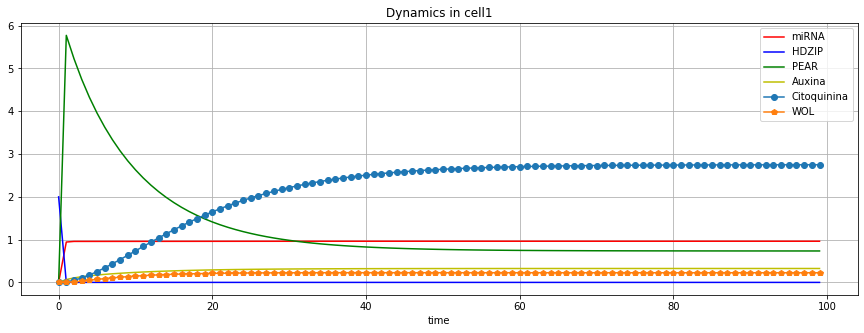

In [14]:
#Safe values from the x array
x,y,z,w,a,b,x2,y2,z2,w2,a2,b2,x3,y3,z3,w3,a3,b3,x4,y4,z4,w4,a4,b4 = X.T
#plot
fig1 = plt.figure(figsize=(15,5))
#fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax = plt.subplot('111')
ax.plot(x, 'r-', label='miRNA')
ax.plot(y, 'b-', label='HDZIP')
ax.plot(z, 'g-', label='PEAR')
ax.plot(w, 'y-', label='Auxina')
ax.plot(a, 'o-', label='Citoquinina')
ax.plot(b, 'p-', label='WOL')
ax.set_xlabel('time')
ax.set_title("Dynamics in cell1")
ax.grid()
ax.legend(loc='best')



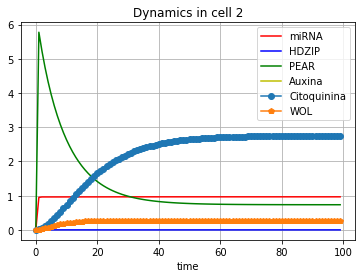

In [15]:
ax2 = plt.subplot('111')
ax2.plot(x2, 'r-', label='miRNA')
ax2.plot(y2, 'b-', label='HDZIP')
ax2.plot(z2, 'g-', label='PEAR')
ax2.plot(w2, 'y-', label='Auxina')
ax2.plot(a2, 'o-', label='Citoquinina')
ax2.plot(b2, 'p-', label='WOL') 
ax2.set_title("Dynamics in cell 2")
ax2.set_xlabel("time")
ax2.grid()
ax2.legend(loc='best')



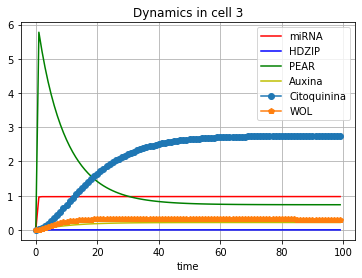

In [16]:
ax3 = plt.subplot('111')
ax3.plot(x3, 'r-', label='miRNA')
ax3.plot(y3, 'b-', label='HDZIP')
ax3.plot(z3, 'g-', label='PEAR')
ax3.plot(w3, 'y-', label='Auxina')
ax3.plot(a3, 'o-', label='Citoquinina')
ax3.plot(b3, 'p-', label='WOL') 
ax3.set_title("Dynamics in cell 3")
ax3.set_xlabel("time")
ax3.grid()
ax3.legend(loc='best')


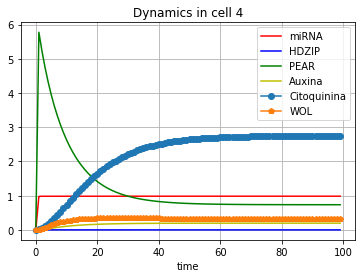

In [17]:
ax4 = plt.subplot('111')
ax4.plot(x4, 'r-', label='miRNA')
ax4.plot(y4, 'b-', label='HDZIP')
ax4.plot(z4, 'g-', label='PEAR')
ax4.plot(w4, 'y-', label='Auxina')
ax4.plot(a4, 'o-', label='Citoquinina')
ax4.plot(b4, 'p-', label='WOL') 
ax4.set_title("Dynamics in cell 4")
ax4.set_xlabel("time")
ax4.grid()
ax4.legend(loc='best')


Como se puede ver en las gráficas todas las células se comportan de la misma forma sin importar la posición. Posiblemente no tener todos los subcompartimentos y su respectiva tasa de difusión influye en el hecho de no observar el mismo comportamiento que en el modelo de Miyashima. Otra diferencia es que no se usa el valor promedio de concentración por célula en las funciones de activación transcripcional. Sin embargo al no tener todos los compartimentos no importa el promedio ya que se tiene el mismo valor para toda la célula.

In [68]:
#Tratar de resolver el problema de tener tantas funciones por célula con otras funciones.
def diff(NUMPY_MULTIARRAY,coeficiente,pos):#FUNCION QUE CALCULA LA DIFUSION
    flux = np.zeros(len(NUMPY_MULTIARRAY))#ARRAGLO PARA GUARDAR LA DIFUSION EN CADA CELULA
    for e in range(len(NUMPY_MULTIARRAY)):#LOOP PARA CALCULAR LA DIFUSION EN CADA CELULA
        if e == 0:#CHECA LA POSICION DE LA CELULA
            flux[e] = -coeficiente*(NUMPY_MULTIARRAY[e,pos]-NUMPY_MULTIARRAY[e+1,pos])#SI TIENE SOLO UN VECINO
        elif e == (len(NUMPY_MULTIARRAY)-1):
            flux[e] = -coeficiente*(NUMPY_MULTIARRAY[e,pos]-NUMPY_MULTIARRAY[e-1,pos])
        else:
            flux[e] = -coeficiente*(2*NUMPY_MULTIARRAY[e,pos]-NUMPY_MULTIARRAY[e-1,pos] -NUMPY_MULTIARRAY[e+1,pos])#SI TIENE DOS VECINOS
    return flux

#def diff_p(NUMPY_MULTIARRAY,coeficiente,pos)_
#print(estado_inicial_genes)
external_cells= [0,2]
print(external_cells)
estado_inicial_genes=np.zeros((3,6))
cond_iniciales=np.array([[10,10,0,0,0,0],
                    [0,0,0,0,0,0],
                    [0,0,0,0,0,0],
                    [0,0,0,0,0,0],
                    [0,0,0,0,0,0],
                    [0,0,0,0,0,0],     
                    [10,10,0,0,0,0]])
fluxdm=diff(cond_iniciales,Dm,0)  
print(fluxdm)

[0, 2]
[-4000.  4000.     0.     0.     0.  4000. -4000.]


In [81]:
#Las funciones de activación transcripcional se pueden definir de forma independiente
#El arreglo por célula siempre tiene el mismo orden para poder usar las fórmulas 
#x[0]=mirna,x[1]=hdzip ,x[2]=pear,x[3]=auxina, x[4]=citoquina, x[5]=resp.citoquina
#x[6]=pxy/wox4
#f_h = lamda *(1 +((X[3]**n_h)/(tetha_h**n_h)+(X[3]**n_h))) + ((X[2]**m_h)/(psi_h**m_h + X[2]**m_h))
#f_p = tetha_p**n_p/((tetha_p**n_p) + X[1]**n_p) * ((X[5]**m_p)/((psi_p**m_p) + X[5]**m_p))
#f_c = X[3]**n_c/((tetha_c**n_c)+ X[3]**n_c)
#f_w = tetha_r**n_r/((tetha_r**n_r)+X[3]**n_r) * ((X[4]**m_r)/((psi_r**m_r)+X[4]**m_r))
#f_a = X[1]**n_a/((tetha_a**n_a)+ X[1]**n_a)
#f_pw= X[1]**n_pw/((tetha_pw**n_pw)+ X[1]**n_pw)
#miRNAs
def dmdt(array):
    temp=diff(cond_iniciales,Dm,0)
    dmidt = np.zeros(len(cond_iniciales))
    for i in range(len(temp)):
        dmidt[i]= temp[i]+ mu_m*array[i,0] - (teta_m * array[i,0] * array[i,1]) 
        print(array[i,0],array[i,1])
    return dmidt
#HD-ZIPIII
def dhdt(array):
    dhidt = np.zeros(len(cond_iniciales))
    f_ih = np.zeros(len(cond_iniciales))
    for i in range(len(f_ih)):
        f_ih[i] = lamda *(1 +((array[i,3]**n_h)/(tetha_h**n_h)+(array[i,3]**n_h))) + ((array[i,2]**m_h)/(psi_h**m_h + array[i,2]**m_h))
        dhidt[i]= mu_h*(f_ih[i]-array[i,1]-(teta_h*array[i,0]*array[i,1]))
    return dhidt
#Pear
def dpdt(array):
    dpidt = np.zeros(len(cond_iniciales))
    f_ip = np.zeros(len(cond_iniciales))
    for i in range(len(f_ip)):
        f_ip[i] = tetha_p**n_p/((tetha_p**n_p) + array[i,1]**n_p) * ((array[i,5]**m_p)/((psi_p**m_p) + array[1,5]**m_p))
        if i == 0:
            dpidt[i]=mu_p*(f_ip[i]-array[i,2]) + Dp*((array[i+1,2]-array[i,2])/1+(((array[i,1]+array[i+1,1])/(2*psi))**q))
        elif i == (len(array)-1):
            dpidt[i]=mu_p*(f_ip[i]-array[i,2]) + Dp*((array[i-1,2]-array[i,2])/1+(((array[i-1,1]+array[i,1])/(2*psi))**q))
        else:
            dpidt[i]=mu_p*(f_ip[i]-array[i,2]) + Dp*((array[i-1,2]-array[i,2])/1+(((array[i,1]+array[i+1,1])/(2*psi))**q)+(array[i+1,2]-array[i,2])/1+(((array[i,1]+array[i+1,1])/(2*psi))**q))
        return dpidt

#Auxina
def dadt(array):
    temp=diff(cond_iniciales,Da,3)
    daidt = np.zeros(len(cond_iniciales))
    f_ia = np.zeros(len(cond_iniciales))
    for i in range(len(temp)):
        f_ia[i] = array[i,1]**n_a/((tetha_a**n_a)+ array[i,1]**n_a)
        if i == 0:
            daidt[i]= alpha_1 -array[1,3]+temp[i]
        else:
            daidt[i]= -array[1,3]+temp[i]    
    return daidt
#Citoquinina
def dcdt(array):
    temp=diff(cond_iniciales,Dc,4)
    dcidt = np.zeros(len(cond_iniciales))
    f_ic = np.zeros(len(cond_iniciales))
    for i in range(len(temp)):
        f_ic[i] = array[i,3]**n_c/((tetha_c**n_c)+ array[i,3]**n_c)
        dcidt[i]= mu_c*(f_ic[i] - array[i,4])+ temp[i]
    return dcidt

#Respuesta a Citoquinina WOL 
def drdt(array):
    dridt = np.zeros(len(cond_iniciales))
    f_ir = np.zeros(len(cond_iniciales))
    for i in range(len(f_ir)):
        f_ir[i] = tetha_r**n_r/((tetha_r**n_r)+array[i,3]**n_r) * ((array[i,4]**m_r)/((psi_r**m_r)+array[i,4]**m_r))
        dridt[i]= mu_r*(f_ir[i] - array[i,5])
    return dridt

10 10
0 0
0 0
0 0
0 0
0 0
10 10
[-53990.   4000.      0.      0.      0.   4000. -53990.]
[-1.000095e+05  5.000000e-01  5.000000e-01  5.000000e-01  5.000000e-01
  5.000000e-01 -1.000095e+05]
[0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0.]
[3.e+08 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00]


In [90]:
def dx_dt_all(array):
    x=np.empty(0)
    x=np.append(x,dmdt(array))
    x=np.append(x,dhdt(array))
    x=np.append(x,dpdt(array))
    x=np.append(x,dadt(array))
    x=np.append(x,dcdt(array))
    x=np.append(x,drdt(array))
    return(x)
#dmdt(array),dhdt(array),dpdt(array),dadt(array),dcdt(array),drdt(array))

dx_dt_all(cond_iniciales)

10 10
0 0
0 0
0 0
0 0
0 0
10 10


array([-5.399000e+04,  4.000000e+03,  0.000000e+00,  0.000000e+00,
        0.000000e+00,  4.000000e+03, -5.399000e+04, -1.000095e+05,
        5.000000e-01,  5.000000e-01,  5.000000e-01,  5.000000e-01,
        5.000000e-01, -1.000095e+05,  3.000000e+08,  0.000000e+00,
        0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
        0.000000e+00,  1.000000e+00,  0.000000e+00,  0.000000e+00,
        0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
        0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
        0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
        0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
        0.000000e+00,  0.000000e+00])

In [92]:
X, infodict = integrate.odeint(dx_dt_all,cond_iniciales, t, full_output=True)

ValueError: Initial condition y0 must be one-dimensional.